# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

23912


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'radial_position')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\radial_position\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\radial_position\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load radial position summary

Data can be generated from the notebook:

[1_1_radial_position_convexhull_singlecell_dataframe](1_1_radial_position_convexhull_singlecell_dataframe.ipynb)

In [10]:
min_pts_th = 600
output_fname = os.path.join(output_analysis_folder, f'radial_pos_convexhull_median_summary_{min_pts_th}pts_bysubclass_v2.csv')

sorted_median_radial_pos_all = pd.read_csv(output_fname, index_col=0)
sorted_median_radial_pos_all.head()

,chr,chr_order,norm_radial_position,total_cell,subclass
loci_name,,,,,
chr1_3742742_3759944,1,0.0,0.860136,1022.0,L2/3 IT
chr1_6245958_6258969,1,1.0,0.855358,969.0,L2/3 IT
chr1_8740008_8759916,1,2.0,0.850017,628.0,L2/3 IT
chr1_9627926_9637875,1,3.0,0.839728,960.0,L2/3 IT
chr1_9799472_9811359,1,4.0,0.826204,900.0,L2/3 IT


# Load locus RNA level

In [13]:
sel_class_list = np.unique(sorted_median_radial_pos_all['subclass'])
sel_class_list

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip'], dtype=object)

In [60]:
import tqdm

rna_analysis_folder = r'L:\Shiwei\postanalysis_2024\v0\locus_annotation\analysis'

#sel_class_list = transAB_ratio_summary.columns
ref_measure_dict_byGroup = {}

for _class in tqdm.tqdm(sel_class_list):
    _class_name = _class.replace(' ','_').replace('/','_')
    #print(_class_name)
    rna_atac_fname = os.path.join(rna_analysis_folder,f'subclass_{_class_name}_snATAC_snRNA_mean_by_loci.csv')
    if os.path.exists(rna_atac_fname):
        rna_atac_df = pd.read_csv(rna_atac_fname,index_col=1)
        ref_measure_dict_byGroup[_class] = rna_atac_df[:-1]
        
#rna_atac_df

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 212.61it/s]


# Merge RNA/ATAC and radial position results

In [27]:
rna_summary_dict = {'rna':[],'atac':[],'norm_radial_position':[],'total_cell':[],
                    'loci':[],'celltype':[],'chr':[]}

for _group, _rna_df in ref_measure_dict_byGroup.items():
    # append rna/atac results
    rna_summary_dict['rna'].extend(_rna_df['mean_rna_2X_2000kb'].tolist())
    if 'mean_ATAC_2X_2000kb' in _rna_df.columns:
        rna_summary_dict['atac'].extend(_rna_df['mean_ATAC_2X_2000kb'].tolist())
    else: # some celltype does not have atac
        rna_summary_dict['atac'].extend([np.nan]*len(_rna_df))
        
    # append info
    rna_summary_dict['loci'].extend(_rna_df.index.tolist())
    rna_summary_dict['celltype'].extend([_group]*len(_rna_df))
    rna_summary_dict['chr'].extend([i.split('_')[0] for i in _rna_df.index.tolist()])
    
    # append radial position
    ## remove chrY loci
    group_radial_pos_all = sorted_median_radial_pos_all[sorted_median_radial_pos_all['subclass']==_group][:-1]
    if len(group_radial_pos_all)==len(_rna_df):
        group_radial_pos_all = group_radial_pos_all.loc[_rna_df.index]
        radial_pos_list = group_radial_pos_all['norm_radial_position'].tolist()
        radial_N_list = group_radial_pos_all['total_cell'].tolist()
    else:
        radial_pos_list = [np.nan]*len(_rna_df)
        radial_N_list = [np.nan]*len(_rna_df)
        
    rna_summary_dict['norm_radial_position'].extend(radial_pos_list)
    rna_summary_dict['total_cell'].extend(radial_N_list)

rna_summary_df = pd.DataFrame(rna_summary_dict)
rna_summary_df

,rna,atac,norm_radial_position,total_cell,loci,celltype,chr
0,9.202454,1.459956,0.831239,1020.0,chr1_3742742_3759944,Astro,chr1
1,11.447853,1.840378,0.785055,807.0,chr1_6245958_6258969,Astro,chr1
2,6.288344,1.721496,0.836495,563.0,chr1_8740008_8759916,Astro,chr1
3,13.969325,2.377364,0.764242,826.0,chr1_9627926_9637875,Astro,chr1
4,13.969325,2.404199,0.750467,770.0,chr1_9799472_9811359,Astro,chr1
...,...,...,...,...,...,...,...
35653,11.284799,NaN,0.792644,60.0,chrX_163750534_163758706,Vip,chrX
35654,4.434066,NaN,0.814361,61.0,chrX_166247682_166259932,Vip,chrX
35655,32.402015,NaN,0.796547,54.0,chrX_167157164_167167452,Vip,chrX
35656,29.576007,NaN,0.794884,51.0,chrX_168746045_168757590,Vip,chrX


## define activity to categories

In [48]:
# percentile threshold
h_p = 75
l_p = 25

for _col in ['rna','atac'][:]:
    #if assign_rna_by_absolute: # assign using the percentile including all celltypes
    _method = 'abs'
    active_th_h = np.percentile(rna_summary_df[_col], h_p)
    active_th_l = np.percentile(rna_summary_df[_col], l_p)

    rna_summary_df.loc[rna_summary_df[_col]>active_th_h,f'{_method}_{_col}_activity'] = 'high' 
    rna_summary_df.loc[rna_summary_df[_col]<=active_th_l,f'{_method}_{_col}_activity'] = 'low' 
    rna_summary_df.loc[(rna_summary_df[_col]<=active_th_h) & 
                       (rna_summary_df[_col]>active_th_l),f'{_method}_{_col}_activity'] = 'intermediate' 

    # assign individually by celltype
    _method = 'rel'
    for _class in tqdm.tqdm(sel_class_list):
        if _class in np.unique(rna_summary_df['celltype']):
            sel_rna_summary_df = rna_summary_df[rna_summary_df['celltype']==_class]
            active_th_h = np.percentile(sel_rna_summary_df[_col], h_p)
            active_th_l = np.percentile(sel_rna_summary_df[_col], l_p)
            rna_summary_df.loc[(rna_summary_df['celltype']==_class)&
                               (rna_summary_df[_col]>active_th_h),f'{_method}_{_col}_activity'] = 'high' 
            rna_summary_df.loc[(rna_summary_df['celltype']==_class)&
                               (rna_summary_df[_col]<=active_th_l),f'{_method}_{_col}_activity'] = 'low' 
            rna_summary_df.loc[(rna_summary_df['celltype']==_class)&
                               (rna_summary_df[_col]<=active_th_h) & 
                               (rna_summary_df[_col]>active_th_l),f'{_method}_{_col}_activity'] = 'intermediate' 

rna_summary_df

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 36.60it/s]


,rna,atac,norm_radial_position,total_cell,loci,celltype,chr,abs_atac_activity,rel_atac_activity,abs_rna_activity,rel_rna_activity
0,9.202454,1.459956,0.831239,1020.0,chr1_3742742_3759944,Astro,chr1,NaN,low,intermediate,intermediate
1,11.447853,1.840378,0.785055,807.0,chr1_6245958_6258969,Astro,chr1,NaN,low,intermediate,high
2,6.288344,1.721496,0.836495,563.0,chr1_8740008_8759916,Astro,chr1,NaN,low,intermediate,intermediate
3,13.969325,2.377364,0.764242,826.0,chr1_9627926_9637875,Astro,chr1,NaN,low,intermediate,high
4,13.969325,2.404199,0.750467,770.0,chr1_9799472_9811359,Astro,chr1,NaN,low,intermediate,high
...,...,...,...,...,...,...,...,...,...,...,...
35653,11.284799,NaN,0.792644,60.0,chrX_163750534_163758706,Vip,chrX,NaN,NaN,intermediate,intermediate
35654,4.434066,NaN,0.814361,61.0,chrX_166247682_166259932,Vip,chrX,NaN,NaN,low,low
35655,32.402015,NaN,0.796547,54.0,chrX_167157164_167167452,Vip,chrX,NaN,NaN,high,high
35656,29.576007,NaN,0.794884,51.0,chrX_168746045_168757590,Vip,chrX,NaN,NaN,high,high


# Plot figures for RNA

## scatterplots for radial position and RNA

In [29]:
plot_cell_order = ['Endo', 'Oligo','Pvalb', 'L2/3 IT','L5 ET']

meta NOT subset; don't know how to subset; dropped


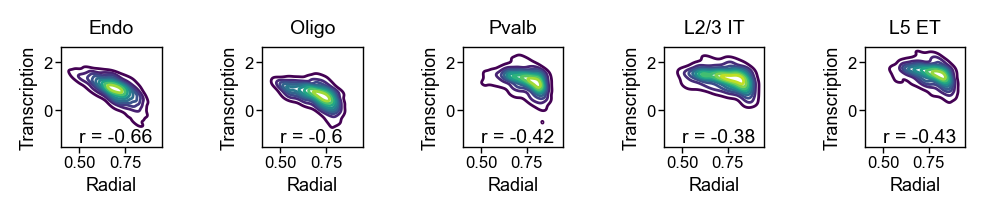

In [44]:
%matplotlib inline
from scipy.stats import linregress, pearsonr, spearmanr

activity_col = 'rel_rna_activity'
rna_col = 'rna'
hist_bins = 5

fig,axes =plt.subplots(1, len(plot_cell_order), figsize=(1*len(plot_cell_order),1.1),dpi=200)

for _idx, _celltype in enumerate(plot_cell_order[:]):
    # get RNA and radial position accordingly
    plot_df = rna_summary_df[rna_summary_df['celltype']==_celltype]
    plot_df = plot_df[(plot_df['chr']!='chrY') ]
    plot_df = plot_df[plot_df[rna_col]>0]
    plot_df[f'log10_{rna_col}'] = np.log10(plot_df[rna_col])
    
    # plot figures
    ax = axes[_idx]
    #_type_colors = {'high':'orange','low':'steelblue','intermediate':'cyan'}
    sel_plot_df = plot_df.copy(deep=True)
    gfg = sns.kdeplot(data=sel_plot_df, x='norm_radial_position',y=f'log10_{rna_col}',
                       levels= hist_bins*2, linewidths=1,
                      ax=ax, fill=False, cmap='viridis', #alpha = 0.6, #bins = hist_bins*2,kind="kde"
                     )
    # calculate color
    values = np.vstack([sel_plot_df['norm_radial_position'], sel_plot_df[f'log10_{rna_col}']])
    kernel = scipy.stats.gaussian_kde(values)(values)
    vmin,vmax = scipy.stats.scoreatpercentile(kernel,10),scipy.stats.scoreatpercentile(kernel,90)

    corr, p = spearmanr(sel_plot_df['norm_radial_position'], sel_plot_df[f'log10_{rna_col}'])
    ax.annotate(f'r = {round(corr,2)}',xy=(0.5,-1.3), fontsize=_font_size)

    ax.set_ylim([-1.5,2.6])
    ax.set_xlim([0.4,0.95])
    ax.set_ylabel(f"Transcription", fontsize=_font_size-0.5, rotation=90,labelpad=2,)
    ax.set_xlabel(f"Radial", fontsize=_font_size-0.5, rotation=0,labelpad=2,)
    ax.tick_params('both',labelsize=_font_size, length=_ticklabel_size)

    ax.set_title(_celltype,fontsize=_font_size,pad=5)
    ax.grid(False)
    
    ax.margins(0.1)
    ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    #_celltype_fname = _celltype.replace('/','_').replace(' ','_')
    
plt.tight_layout()
plt.subplots_adjust(wspace=1, )
plt.savefig(os.path.join(output_figure_folder, f'density_radial_pos_vs_RNA.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')   
plt.show()



## line plots for radial position and RNA

In [45]:
plot_cell_order = ['Endo', 'Oligo','Pvalb', 'L2/3 IT','L5 ET']

meta NOT subset; don't know how to subset; dropped


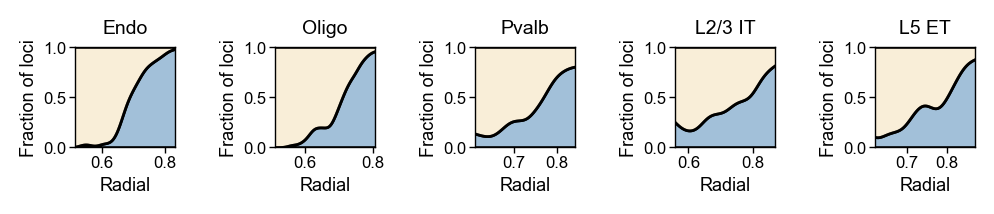

In [69]:
%matplotlib inline
from scipy.stats import linregress, pearsonr, spearmanr

activity_col = 'rel_rna_activity'
rna_col = 'rna'
hist_bins = 10

fig,axes =plt.subplots(1, len(plot_cell_order), figsize=(1*len(plot_cell_order),1.1),dpi=200)

for _idx, _celltype in enumerate(plot_cell_order[:]):
    # get RNA and radial position accordingly
    plot_df = rna_summary_df[rna_summary_df['celltype']==_celltype]
    plot_df = plot_df[(plot_df['chr']!='chrY')]
    plot_df = plot_df[plot_df[rna_col]>0]
    
    # plot figures
    ax = axes[_idx]
    
    _type_colors = {'high':'wheat','low':'steelblue','intermediate':'cyan'}
    sel_plot_df = plot_df[plot_df[activity_col]!='intermediate']
    
    gfg = sns.kdeplot(data=sel_plot_df, x='norm_radial_position',#bins=hist_bins, 
                       hue =activity_col,hue_order = ['high','low'],multiple="fill",
                     ax=ax,palette = _type_colors, 
                       fill=True, linewidth=1,
                       common_norm=True, 
                      legend=False,
                      alpha=0.5)
    
    # for kde, set the bound for real data to reduce artifact
    ax.set_xlim([np.nanpercentile(sel_plot_df['norm_radial_position'],5),
              np.nanpercentile(sel_plot_df['norm_radial_position'],95)])


    ax.set_ylabel(f"Fraction of loci", fontsize=_font_size-0.5, rotation=90,labelpad=2,)
    ax.set_xlabel(f"Radial", fontsize=_font_size-0.5, rotation=0,labelpad=2,)
    ax.tick_params('both',labelsize=_font_size, length=_ticklabel_size)

    ax.set_title(_celltype,fontsize=_font_size,pad=5)
    ax.grid(False)
    
    ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    #_celltype_fname = _celltype.replace('/','_').replace(' ','_')
    
plt.tight_layout()
plt.subplots_adjust(wspace=1, )
plt.savefig(os.path.join(output_figure_folder, f'line_radial_pos_vs_RNA.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')   
plt.show()



# Plot figures for ATAC

## scatterplots for radial position and ATAC

In [29]:
plot_cell_order = ['Endo', 'Oligo','Pvalb', 'L2/3 IT','L5 ET']

meta NOT subset; don't know how to subset; dropped


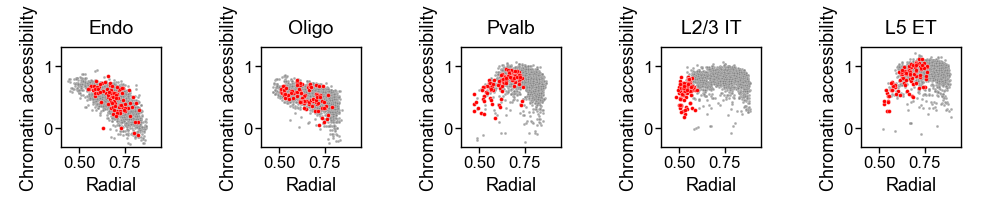

In [71]:
%matplotlib inline
from scipy.stats import linregress, pearsonr, spearmanr

activity_col = 'rel_atac_activity'
rna_col = 'atac'
hist_bins = 5

fig,axes =plt.subplots(1, len(plot_cell_order), figsize=(1*len(plot_cell_order),1.1),dpi=200)

for _idx, _celltype in enumerate(plot_cell_order[:]):
    # get ATAC and radial position accordingly
    plot_df = rna_summary_df[rna_summary_df['celltype']==_celltype]
    plot_df = plot_df[(plot_df['chr']!='chrY') ]
    plot_df = plot_df[plot_df[rna_col]>0]
    plot_df[f'log10_{rna_col}'] = np.log10(plot_df[rna_col])
    
    # plot figures
    ax = axes[_idx]
    #_type_colors = {'high':'orange','low':'steelblue','intermediate':'cyan'}
    sel_plot_df = plot_df.copy(deep=True)

    gfg = sns.scatterplot(data=sel_plot_df, 
                           x='norm_radial_position',y=f'log10_{rna_col}', 
                          alpha = 0.7,
                           color='gray',
                           s=1,rasterized=True,
                           ax=ax)

    chosen_chrom = 'chr7'
    gfg2 = sns.scatterplot(data=sel_plot_df[sel_plot_df['chr']==chosen_chrom], 
                           x='norm_radial_position',y=f'log10_{rna_col}', 
                           color='red',
                           s=2,rasterized=True,
                           ax=ax)
    

    corr, p = spearmanr(sel_plot_df['norm_radial_position'], sel_plot_df[f'log10_{rna_col}'])
    ax.annotate(f'r = {round(corr,2)}',xy=(0.5,-1.3), fontsize=_font_size)

    ax.set_ylim([-0.3,1.3])
    ax.set_xlim([0.4,0.95])
    ax.set_ylabel(f"Chromatin accessibility", fontsize=_font_size-0.5, rotation=90,labelpad=2,)
    ax.set_xlabel(f"Radial", fontsize=_font_size-0.5, rotation=0,labelpad=2,)
    ax.tick_params('both',labelsize=_font_size, length=_ticklabel_size)

    ax.set_title(_celltype,fontsize=_font_size,pad=5)
    ax.grid(False)
    
    ax.margins(0.1)
    ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    #_celltype_fname = _celltype.replace('/','_').replace(' ','_')
    
plt.tight_layout()
plt.subplots_adjust(wspace=1, )
plt.savefig(os.path.join(output_figure_folder, f'density_radial_pos_vs_ATAC.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')   
plt.show()

## line plots for radial position and ATAC

In [ ]:
plot_cell_order = ['Endo', 'Oligo','Pvalb', 'L2/3 IT','L5 ET']

meta NOT subset; don't know how to subset; dropped


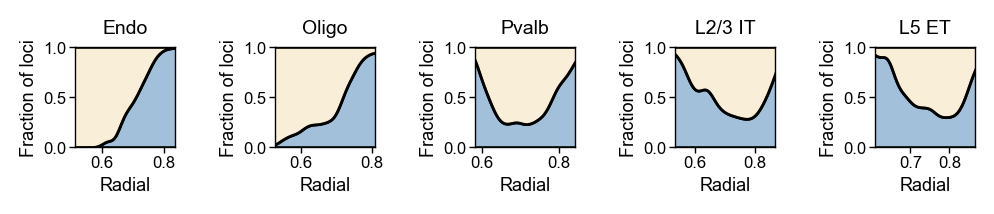

In [72]:
%matplotlib inline
from scipy.stats import linregress, pearsonr, spearmanr

activity_col = 'rel_atac_activity'
rna_col = 'atac'
hist_bins = 10

fig,axes =plt.subplots(1, len(plot_cell_order), figsize=(1*len(plot_cell_order),1.1),dpi=200)

for _idx, _celltype in enumerate(plot_cell_order[:]):
    # get RNA and radial position accordingly
    plot_df = rna_summary_df[rna_summary_df['celltype']==_celltype]
    plot_df = plot_df[(plot_df['chr']!='chrY')]
    plot_df = plot_df[plot_df[rna_col]>0]
    
    # plot figures
    ax = axes[_idx]
    
    _type_colors = {'high':'wheat','low':'steelblue','intermediate':'cyan'}
    sel_plot_df = plot_df[plot_df[activity_col]!='intermediate']
    
    gfg = sns.kdeplot(data=sel_plot_df, x='norm_radial_position',#bins=hist_bins, 
                       hue =activity_col,hue_order = ['high','low'],multiple="fill",
                     ax=ax,palette = _type_colors, 
                       fill=True, linewidth=1,
                       common_norm=True, 
                      legend=False,
                      alpha=0.5)
    
    # for kde, set the bound for real data to reduce artifact
    ax.set_xlim([np.nanpercentile(sel_plot_df['norm_radial_position'],5),
              np.nanpercentile(sel_plot_df['norm_radial_position'],95)])


    ax.set_ylabel(f"Fraction of loci", fontsize=_font_size-0.5, rotation=90,labelpad=2,)
    ax.set_xlabel(f"Radial", fontsize=_font_size-0.5, rotation=0,labelpad=2,)
    ax.tick_params('both',labelsize=_font_size, length=_ticklabel_size)

    ax.set_title(_celltype,fontsize=_font_size,pad=5)
    ax.grid(False)
    
    ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    #_celltype_fname = _celltype.replace('/','_').replace(' ','_')
    
plt.tight_layout()
plt.subplots_adjust(wspace=1, )
plt.savefig(os.path.join(output_figure_folder, f'line_radial_pos_vs_ATAC.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')   
plt.show()

